# Perlin noise simulations

In [8]:
import os
import pickle
import numpy as np
import pandas as pd

from tqdm import tqdm, trange

import seaborn as sns
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import matplotlib.gridspec as gridspec

In [9]:
out = './out/'
data = './data/'

### Just some matplotlib and seaborn parameter tuning

In [10]:
axistitlesize = 20
axisticksize = 17
axislabelsize = 26
axislegendsize = 23
axistextsize = 20
axiscbarfontsize = 15

# Set axtick dimensions
major_size = 6
major_width = 1.2
minor_size = 3
minor_width = 1
mpl.rcParams['xtick.major.size'] = major_size
mpl.rcParams['xtick.major.width'] = major_width
mpl.rcParams['xtick.minor.size'] = minor_size
mpl.rcParams['xtick.minor.width'] = minor_width
mpl.rcParams['ytick.major.size'] = major_size
mpl.rcParams['ytick.major.width'] = major_width
mpl.rcParams['ytick.minor.size'] = minor_size
mpl.rcParams['ytick.minor.width'] = minor_width

mpl.rcParams.update({'figure.autolayout': False})

# Seaborn style settings
sns.set_style({'axes.axisbelow': True,
               'axes.edgecolor': '.8',
               'axes.facecolor': 'white',
               'axes.grid': True,
               'axes.labelcolor': '.15',
               'axes.spines.bottom': True,
               'axes.spines.left': True,
               'axes.spines.right': True,
               'axes.spines.top': True,
               'figure.facecolor': 'white',
               'font.family': ['sans-serif'],
               'font.sans-serif': ['Arial',
                'DejaVu Sans',
                'Liberation Sans',
                'Bitstream Vera Sans',
                'sans-serif'],
               'grid.color': '.8',
               'grid.linestyle': '--',
               'image.cmap': 'rocket',
               'lines.solid_capstyle': 'round',
               'patch.edgecolor': 'w',
               'patch.force_edgecolor': True,
               'text.color': '.15',
               'xtick.bottom': True,
               'xtick.color': '.15',
               'xtick.direction': 'in',
               'xtick.top': True,
               'ytick.color': '.15',
               'ytick.direction': 'in',
               'ytick.left': True,
               'ytick.right': True})

# Colorpalettes, colormaps, etc.
sns.set_palette(palette='rocket')
rocket_cmap = sns.color_palette('rocket', as_cmap=True)

In [224]:
# Size of grid
nrows = 10
ncols = 20
step = 1
res = 100

In [225]:
coords = pd.read_csv(data + 'main_grid.dat',
                     names=['x', 'y'], usecols=[0,1], skiprows=2)
sub = pd.read_csv(data + 'sub_grid.dat',
                     names=['x', 'y'], usecols=[0,1], skiprows=2)
cells = pd.read_csv(data + 'cell_corners.dat',
                    names=['u_left', 'u_right', 'b_left', 'b_right'], usecols=[0,1,2,3], skiprows=2)
grad = pd.read_csv(data + 'gradient_field.dat',
                   names=['x', 'y'], usecols=[0,1], skiprows=2)
dot = pd.read_csv(data + 'dot_grid.dat',
                  names=['x1', 'x2', 'x3', 'x4'], usecols=[0,1,2,3], skiprows=2)
ngp = np.genfromtxt(data + 'ngp.dat', skip_header=2, delimiter=',')[:-1]
interp = np.genfromtxt(data + 'interp_grid.dat', skip_header=2, delimiter=',')[:-1]

coords /= step
sub /= step

In [226]:
#analyzetree

In [227]:
# Create coord. system
yc = np.arange(0,nrows,1)
xc = np.arange(0,ncols,1)

# Load in gradients
x = grad.x.values
y = grad.y.values

In [228]:
i = pd.Series(['x{}'.format(int(gp+1)) for gp in ngp])
img = dot.lookup(i.index, i.values)

<ipython-input-228-0f41524d1529>:2: FutureWarning: The 'lookup' method is deprecated and will beremoved in a future version.You can use DataFrame.melt and DataFrame.locas a substitute.
  img = dot.lookup(i.index, i.values)


In [233]:
#im = dot['x2'].values.reshape(((nrows-1)*res+1, (ncols-1)*res+1))
ngps = ngp.reshape(((nrows-1)*res+1, (ncols-1)*res+1))
im_1 = interp.reshape(((nrows-1)*res+1, (ncols-1)*res+1))
im_2 = img.reshape(((nrows-1)*res+1, (ncols-1)*res+1))

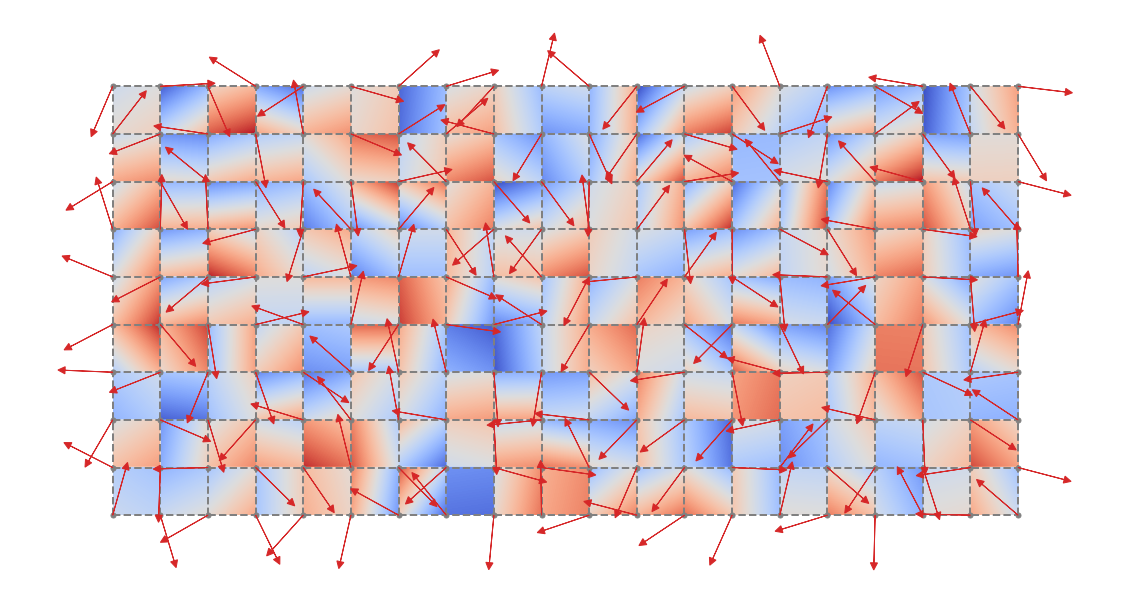

In [242]:
fig, axes = plt.subplots(figsize=(20,20))
axes.set_aspect('equal')
axes.axis('off')

axes.imshow(im_1, extent=(0,ncols-1,0,nrows-1),
            cmap=cm.coolwarm)

for i in range(nrows):
    for j in range(ncols):
        k = i * ncols + j
        axes.arrow(x=xc[j], y=yc[i], dx=x[k], dy=y[k],
                   color='tab:red', head_width=0.15, head_length=0.15, zorder=4)

# Draw coordinate grid points and gridlines between these points
plt.scatter(coords.x, coords.y,
                color='grey', s=(5)**2)
#plt.scatter(sub.x, sub.y,
#                color='green', s=(3)**2, alpha=0.5)
    
for i in range(ncols):
    axes.plot([i, i], [0, nrows-1],
              color='grey', ls='--', lw=2)
for i in range(nrows):
    axes.plot([0, ncols-1], [i, i],
              color='grey', ls='--', lw=2)

# Mark the borders of the last cell
# (Should be seen in the upper right corner)
#for c in cells.iloc[-1]:
#    plt.scatter(coords.iloc[c].x, coords.iloc[c].y,
#                color='tab:green', s=(10)**2)

plt.show()